In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [2]:
df_cluster = pd.read_parquet(path="./../data/clean_data/category_seasonal_data.parquet")
df_cluster

,filtered_category,commercial_dates,comdate_diff,freight_value,price,order_purchase_timestamp,time_window_order_names,commercial_date_names,days_since_year_start,days_since_month_start,year,month,day_of_month,day_of_week,filtered_category_coded,commercial_date_coded,time_window_order_coded
0,Outros,2017-05-14,2,21.88,124.99,2017-05-16,Mais de duas semanas,Dia das Maes,133,13,2017,5,14,6,10,3,1
1,Utilidades Domesticas,2018-01-01,11,46.48,289.00,2018-01-12,Mais de duas semanas,Reveillon,0,0,2018,1,1,0,14,9,1
2,Outros,2018-05-13,6,17.79,139.94,2018-05-19,Mais de duas semanas,Dia das Maes,132,12,2018,5,13,6,10,3,1
3,Outros,2018-03-08,5,23.36,149.94,2018-03-13,Mais de duas semanas,Dia da Mulher,66,7,2018,3,8,3,10,1,1
4,Outros,2018-08-12,-14,22.25,230.00,2018-07-29,Duas semanas,Dia dos Pais,223,11,2018,8,12,6,10,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115013,Outros,2018-04-01,6,13.88,74.90,2018-04-07,Mais de duas semanas,Pascoa,90,0,2018,4,1,6,10,8,1
115014,Esporte Lazer,2018-04-01,3,14.16,114.90,2018-04-04,Mais de duas semanas,Pascoa,90,0,2018,4,1,6,6,8,1
115015,Beleza Saude,2018-04-01,7,19.04,37.00,2018-04-08,Mais de duas semanas,Pascoa,90,0,2018,4,1,6,2,8,1
115016,Relogios Presentes,2017-11-24,-21,22.07,689.00,2017-11-03,Duas semanas,Black Friday,327,23,2017,11,24,4,12,0,0


## CLUSTER

In [3]:
df_cluster = df_cluster[df_cluster['filtered_category'] != 'Outros']
df_cluster = df_cluster.drop('commercial_dates', axis=1)
df_cluster = df_cluster.drop('filtered_category', axis=1)
df_cluster = df_cluster.drop('commercial_date_names', axis=1)
df_cluster = df_cluster.drop('time_window_order_names', axis=1)
df_cluster = df_cluster.drop('order_purchase_timestamp', axis=1)

In [4]:
df_cluster

,comdate_diff,freight_value,price,days_since_year_start,days_since_month_start,year,month,day_of_month,day_of_week,filtered_category_coded,commercial_date_coded,time_window_order_coded
1,11,46.48,289.00,0,0,2018,1,1,0,14,9,1
5,-28,22.31,259.90,284,11,2017,10,12,3,6,7,1
6,-17,7.78,14.99,66,7,2018,3,8,3,8,1,0
8,17,14.10,25.00,0,0,2018,1,1,0,3,9,1
9,7,22.57,99.90,0,0,2018,1,1,0,9,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...
115012,-8,20.88,55.00,358,24,2017,12,25,0,14,6,0
115014,3,14.16,114.90,90,0,2018,4,1,6,6,8,1
115015,7,19.04,37.00,90,0,2018,4,1,6,2,8,1
115016,-21,22.07,689.00,327,23,2017,11,24,4,12,0,0


### Clusterizando sample de 10000 linhas

In [19]:
df_sample_10 = df_cluster.sample(n=10000, random_state=42)

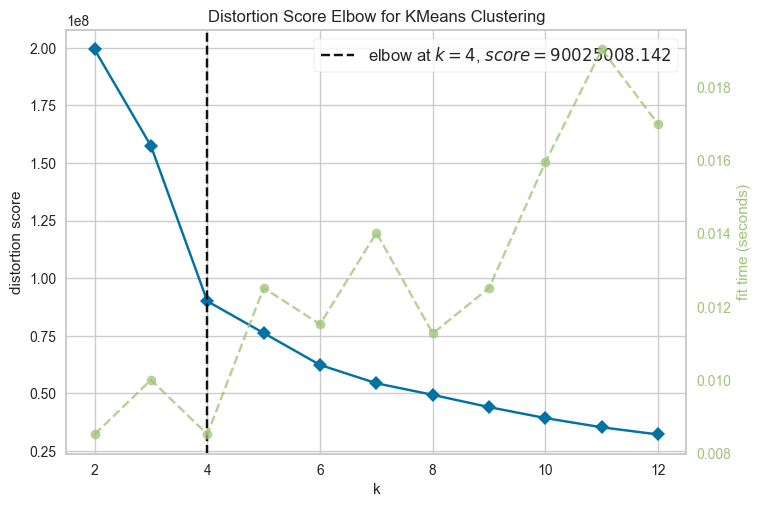

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [20]:
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2, 13))
visualizer.fit(df_sample_10)
visualizer.show()


Text(0.5, 1.0, 'clusters = 4\nscore = 0.4570554193303579')

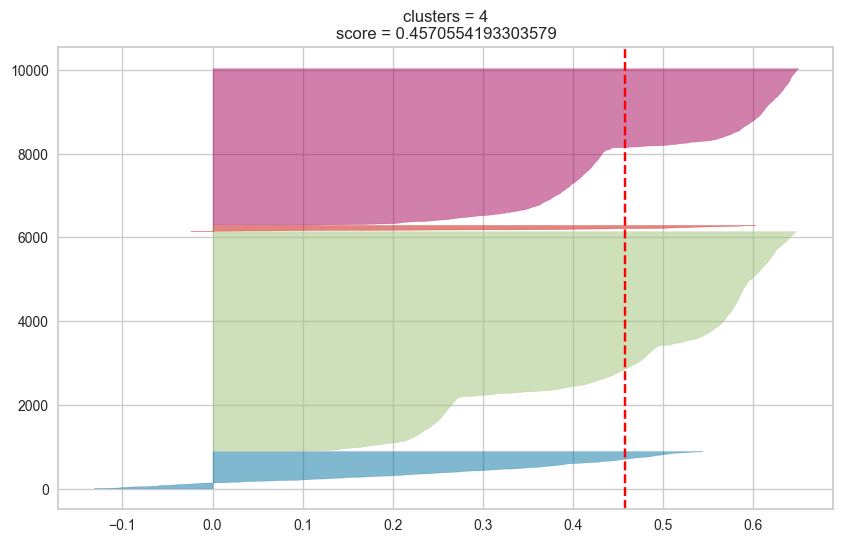

In [21]:
nCluster = 4
fig, (ax1) = plt.subplots(1, 1)
fig.set_size_inches(10, 6)

km = KMeans(n_clusters=nCluster, random_state=42)
visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax1)
visualizer.fit(df_sample_10)
ax1.set_title(f"clusters = {nCluster}\nscore = {visualizer.silhouette_score_}") 

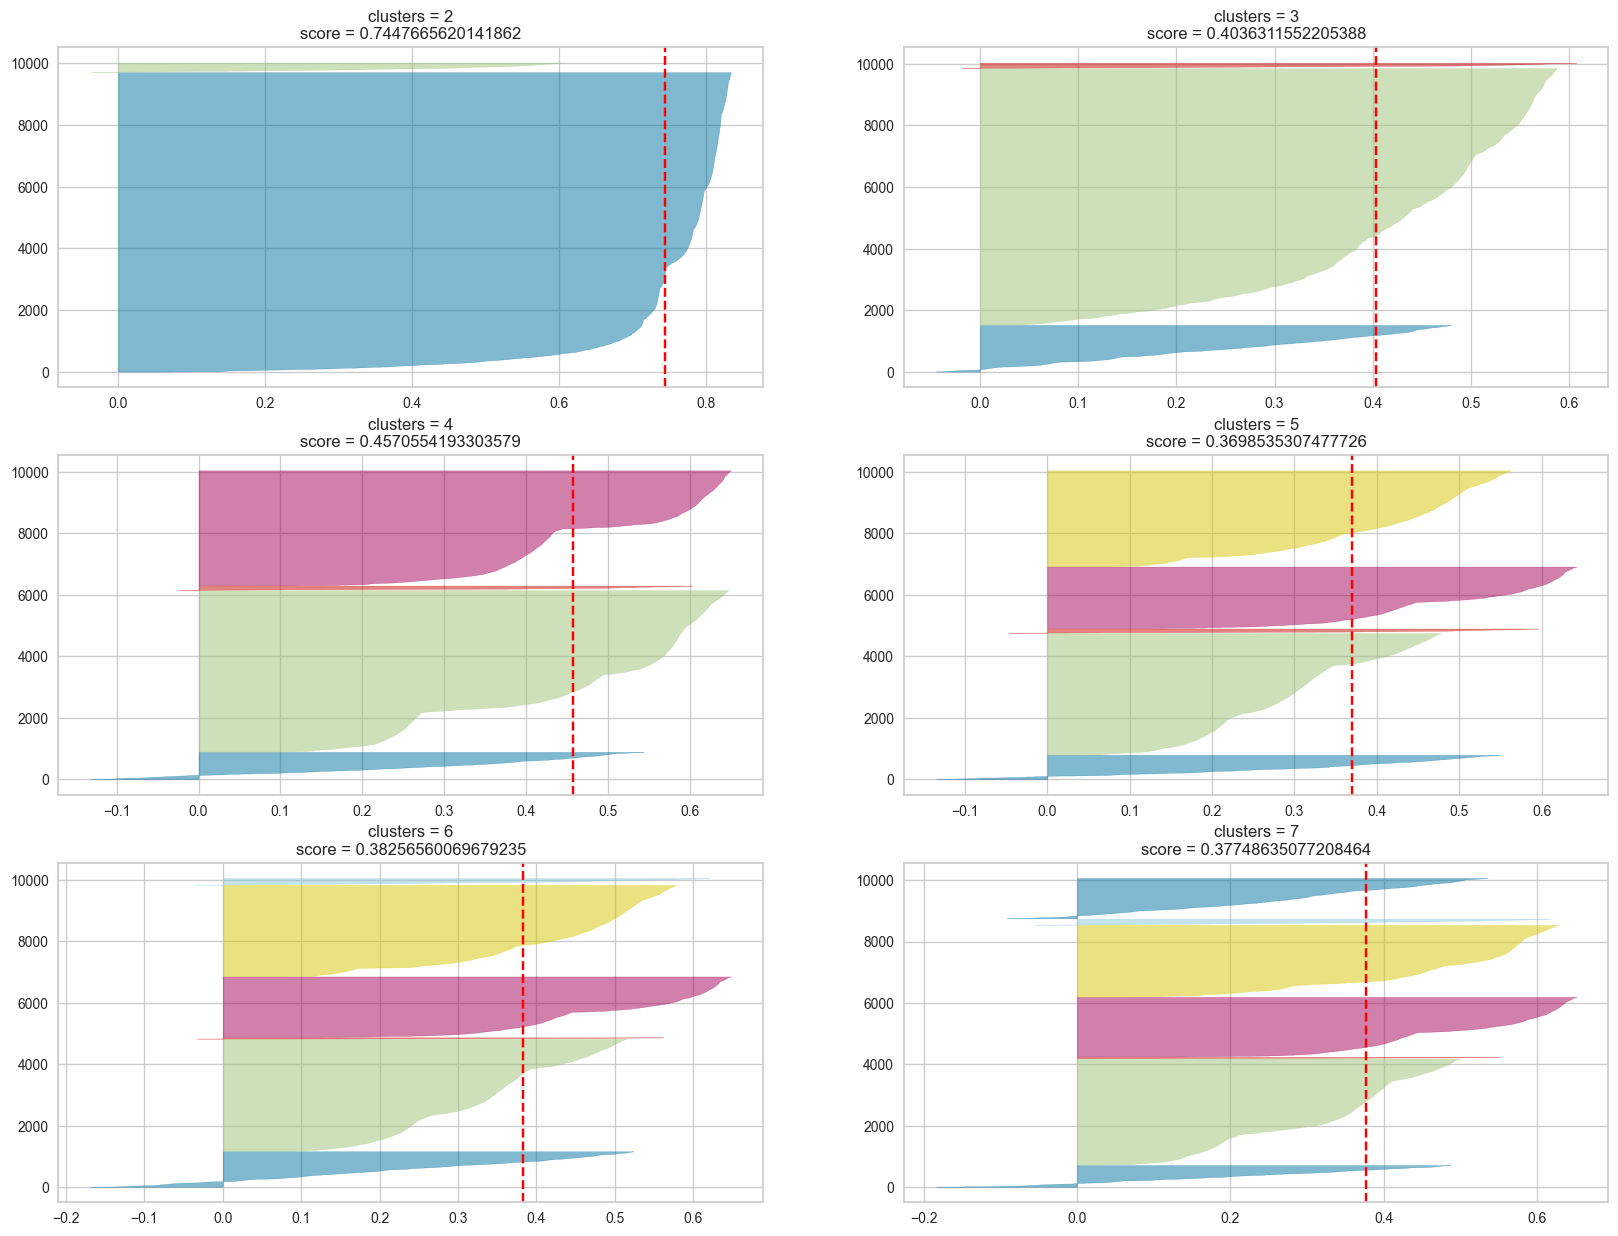

In [22]:
initRange=2
endRange=8

fig, ax = plt.subplots(3, 2, figsize=(20,15))
for nCluster in range(initRange, endRange):
    km = KMeans(n_clusters=nCluster, random_state=42)
    q, mod = divmod(nCluster, 2)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df_sample_10)
    ax[q-1][mod].set_title(f"clusters = {nCluster}\nscore = {visualizer.silhouette_score_}") 

### Clusterizando sample de 10000 linhas normalizado

In [23]:
normalizer = MinMaxScaler()
df_sample_10_normalized = normalizer.fit_transform(df_sample_10)

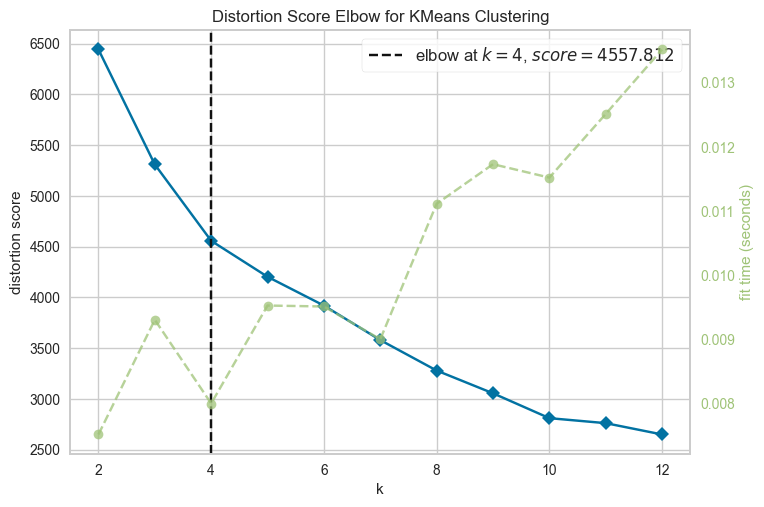

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [24]:
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2, 13))
visualizer.fit(df_sample_10_normalized)
visualizer.show()

Text(0.5, 1.0, 'clusters normalizado = 4\nscore = 0.26050422897832276')

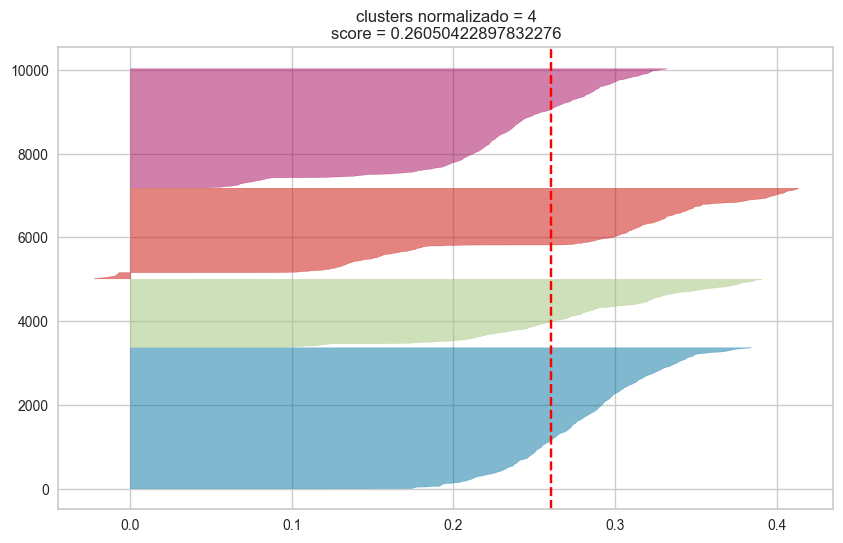

In [32]:
nCluster = 4
fig, (ax1) = plt.subplots(1, 1)
fig.set_size_inches(10, 6)

km = KMeans(n_clusters=nCluster, random_state=42)
visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax1)
visualizer.fit(df_sample_10_normalized)
ax1.set_title(f"clusters normalizado = {nCluster}\nscore = {visualizer.silhouette_score_}") 

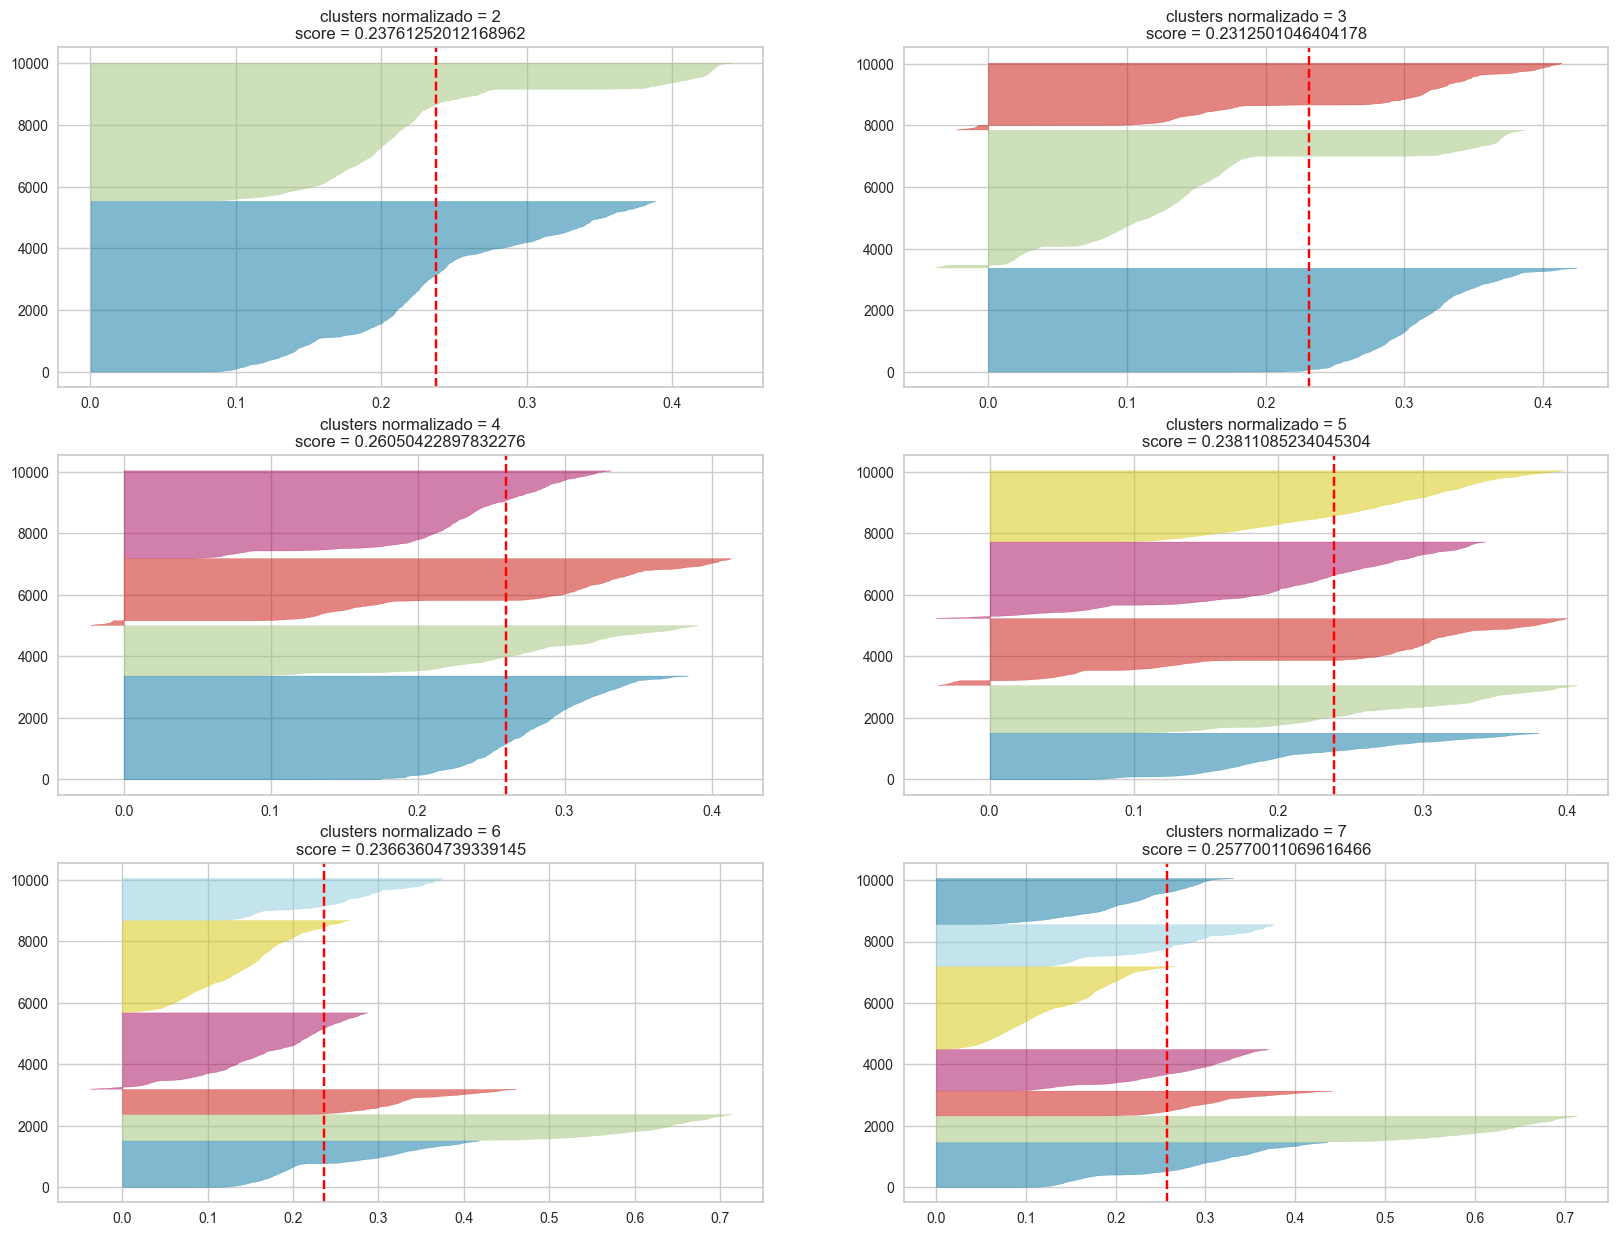

In [33]:
initRange=2
endRange=8

fig, ax = plt.subplots(3, 2, figsize=(20,15))
for nCluster in range(initRange, endRange):
    km = KMeans(n_clusters=nCluster, random_state=42)
    q, mod = divmod(nCluster, 2)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df_sample_10_normalized)
    ax[q-1][mod].set_title(f"clusters normalizado = {nCluster}\nscore = {visualizer.silhouette_score_}") 

### Cluster com sample de 10000 linhas padronizado

In [27]:
scaler = StandardScaler()
df_sample_10_standardized = scaler.fit_transform(df_sample_10)

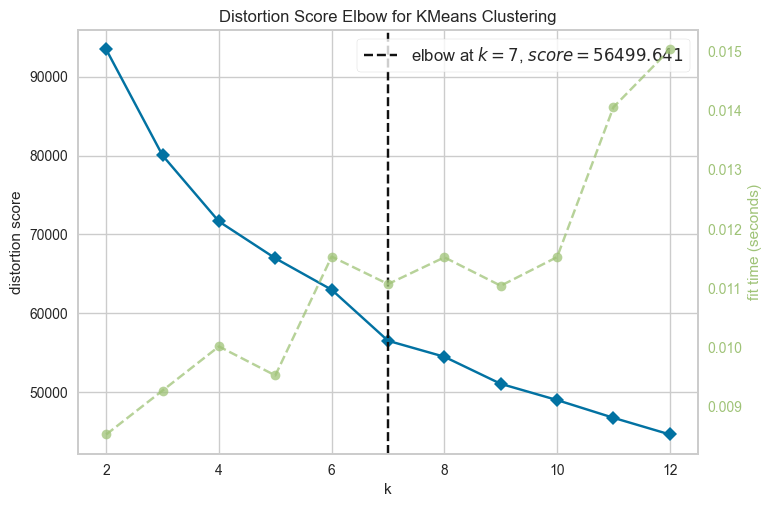

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [28]:
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2, 13))
visualizer.fit(df_sample_10_standardized)
visualizer.show()

Text(0.5, 1.0, 'clusters padronizado = 7\nscore = 0.21589744324476706')

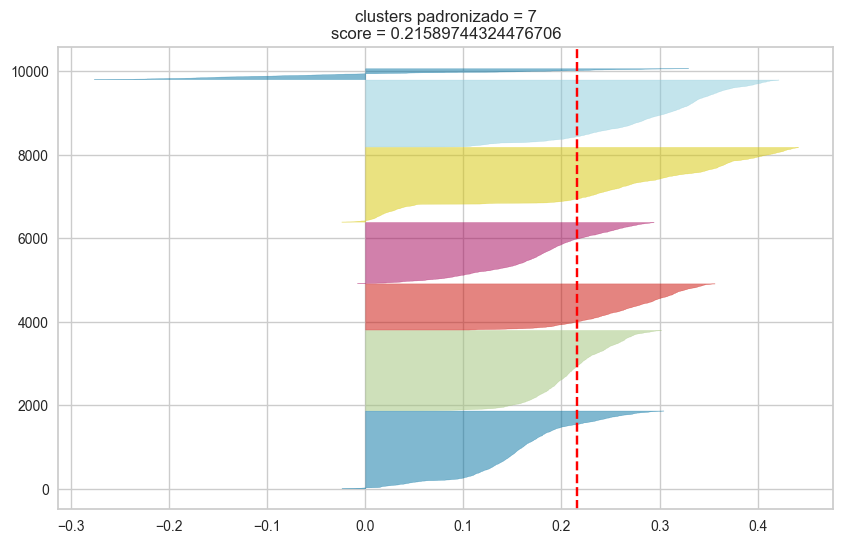

In [34]:
nCluster = 7
fig, (ax1) = plt.subplots(1, 1)
fig.set_size_inches(10, 6)

km = KMeans(n_clusters=nCluster, random_state=42)
visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax1)
visualizer.fit(df_sample_10_standardized)
ax1.set_title(f"clusters padronizado = {nCluster}\nscore = {visualizer.silhouette_score_}") 

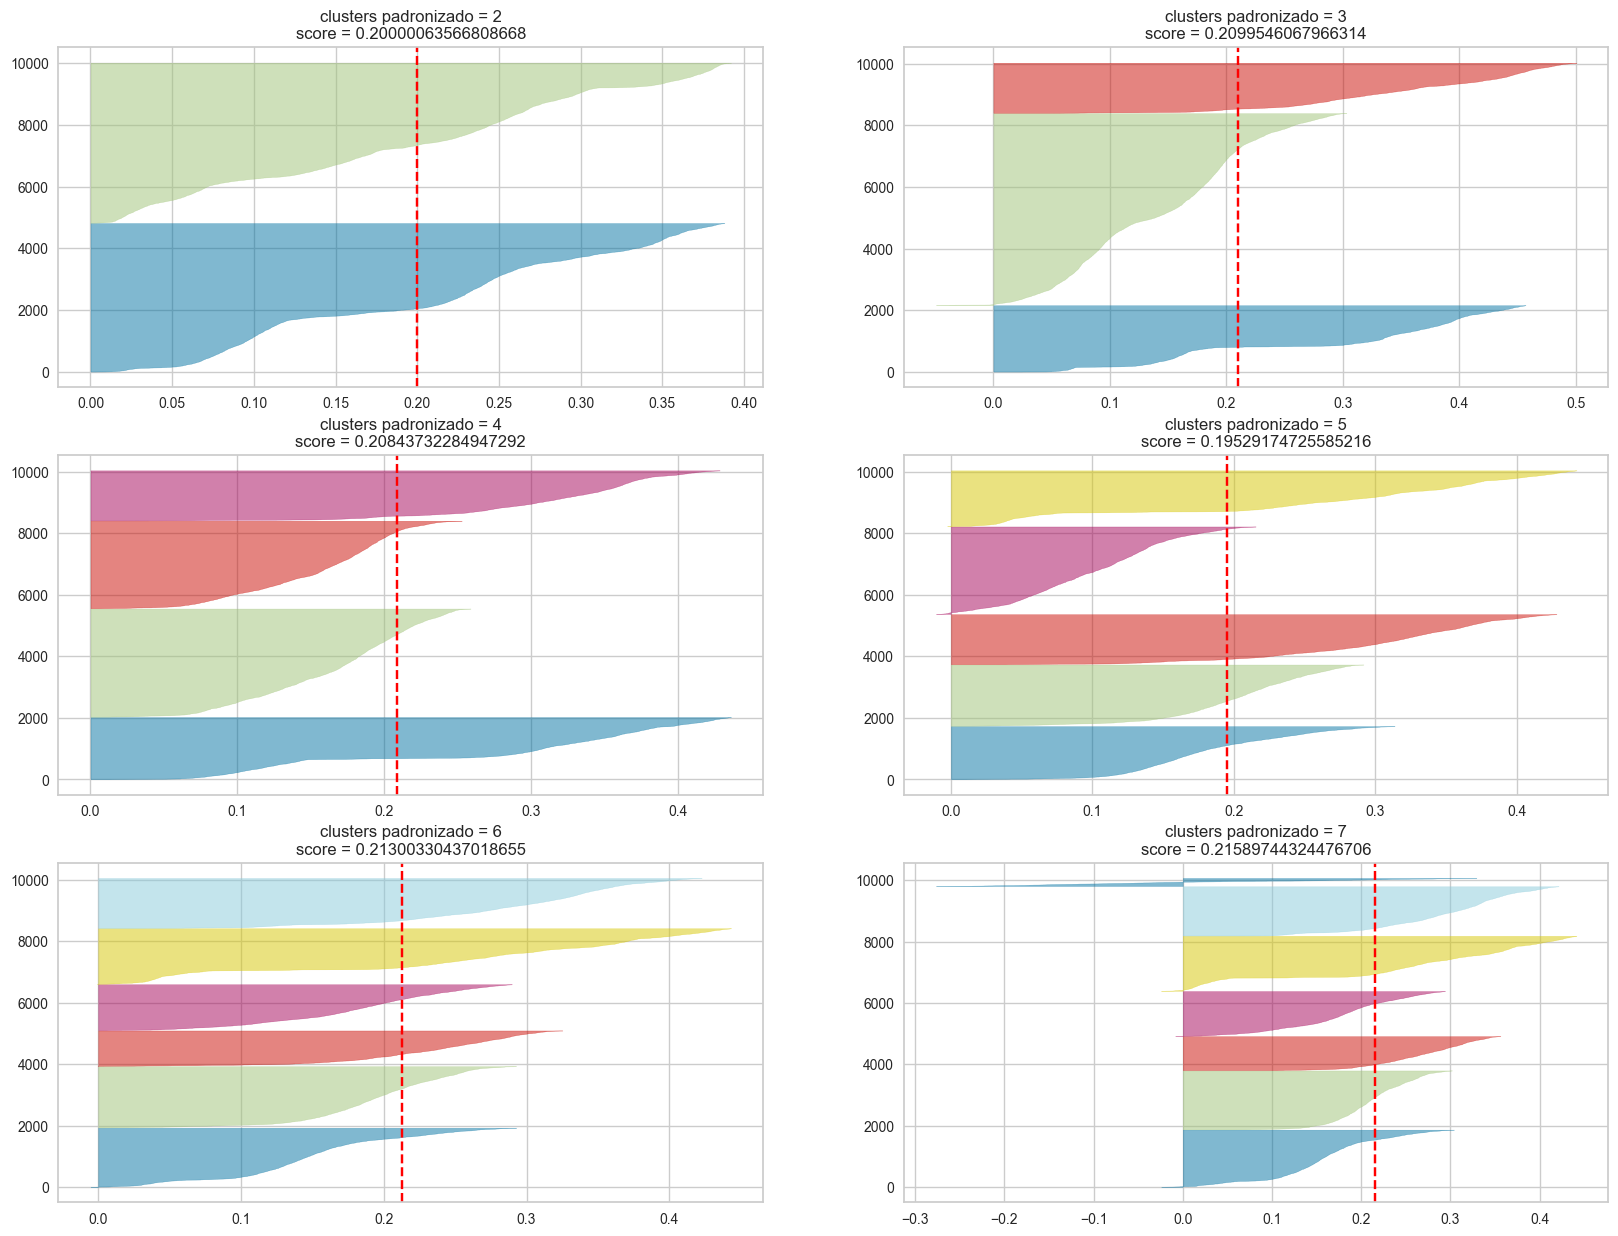

In [37]:
initRange=2
endRange=8

fig, ax = plt.subplots(3, 2, figsize=(20,15))
for nCluster in range(initRange, endRange):
    km = KMeans(n_clusters=nCluster, random_state=42)
    q, mod = divmod(nCluster, 2)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df_sample_10_standardized)
    ax[q-1][mod].set_title(f"clusters padronizado = {nCluster}\nscore = {visualizer.silhouette_score_}") 

## Seguindo com o cluster normalizado

In [31]:
# Erro ao utilizar dataframe normalizado no kmeans
normalizer = MinMaxScaler()
df = normalizer.fit_transform(df_cluster)
n_clusters = 6
kmeans_kwargs = {
    "init": "k-means++",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

kmeans = KMeans(n_clusters=n_clusters, **kmeans_kwargs)
df['hue'] = kmeans.fit_predict(df)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices